In [59]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy

#### Read predict data "open, high, low, close"

In [60]:
log_files_path_data = 'Data/'
dfmain = pd.read_csv(log_files_path_data + "OHLC.csv",index_col=False)
dfmain.shape

(2079, 4)

In [61]:
Open = dfmain["Open Price"]
Low = dfmain["Low Price"]
High = dfmain["High Price"]
Close = dfmain["Close Price"]

#### Read the input dataset 

In [64]:
dfn = pd.read_csv(log_files_path_data + "AE17-13-9_60-40-25-15-6_Raw_NLP.csv", index_col = False, header = None)
dfn.shape

(2079, 15)

In [65]:
# Overview the dataset 
dfn.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.674454,0.089131,0.977122,0.785690,0.162722,0.216673,0.942604,0.056018,0.827595,0.762205,0.449823,0.561242,0.549564,0.452150,0.165995
1,0.669599,0.099878,0.970287,0.779963,0.214932,0.244117,0.919626,0.068781,0.825189,0.539019,0.160101,0.351476,0.281099,0.226153,0.633543
2,0.614149,0.140983,0.958266,0.687618,0.266154,0.319429,0.863559,0.116622,0.818192,0.349549,0.600821,0.776673,0.816259,0.515307,0.349485
3,0.595236,0.155576,0.953943,0.649194,0.267197,0.339938,0.847498,0.132306,0.810627,0.432826,0.949865,0.855541,0.339373,0.284957,0.755221
4,0.525650,0.215299,0.939275,0.537210,0.286292,0.436343,0.745649,0.203407,0.806300,0.659844,0.574333,0.700355,0.061517,0.729355,0.586799
5,0.460692,0.282572,0.922693,0.431642,0.295366,0.532323,0.620437,0.286428,0.796329,0.787632,0.054927,0.557737,0.150311,0.228384,0.564077
6,0.417016,0.327863,0.902162,0.350576,0.327024,0.621198,0.488427,0.357459,0.781011,0.639138,0.674812,0.893641,0.401577,0.133747,0.446126
7,0.361323,0.411874,0.870468,0.271901,0.372983,0.716010,0.329779,0.463237,0.759092,0.779370,0.008384,0.114037,0.804071,0.859348,0.066028
8,0.260688,0.550727,0.828060,0.172719,0.358926,0.827914,0.164921,0.649902,0.733790,0.421034,0.215733,0.114458,0.234836,0.764970,0.540765
9,0.269026,0.530502,0.852319,0.152367,0.310837,0.837255,0.184918,0.622954,0.731421,0.013823,0.819234,0.666531,0.211486,0.500217,0.973242


In [66]:
# Depends on the dataset 
# if autoencoder = 9 & Raw_data ==> 9,10,11,12
# if autoencoder = 10 & Raw_data ==> 10,11,12,13
# if autoencoder = 6 & NLP_data ==> 6,7,8,9
# if autoencoder = 10_6 & Raw_NLP_data ==> 16,17,18,19
# etc.

dfn[15] = Open
dfn[16] = Low
dfn[17] = High
dfn[18] = Close

In [67]:
## Full dataset
dfn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.674454,0.089131,0.977122,0.785690,0.162722,0.216673,0.942604,0.056018,0.827595,0.762205,0.449823,0.561242,0.549564,0.452150,0.165995,1276.69,1260.68,1285.31,1284.91
1,0.669599,0.099878,0.970287,0.779963,0.214932,0.244117,0.919626,0.068781,0.825189,0.539019,0.160101,0.351476,0.281099,0.226153,0.633543,1285.82,1261.51,1292.17,1261.52
2,0.614149,0.140983,0.958266,0.687618,0.266154,0.319429,0.863559,0.116622,0.818192,0.349549,0.600821,0.776673,0.816259,0.515307,0.349485,1262.96,1252.01,1271.48,1262.90
3,0.595236,0.155576,0.953943,0.649194,0.267197,0.339938,0.847498,0.132306,0.810627,0.432826,0.949865,0.855541,0.339373,0.284957,0.755221,1262.90,1240.68,1273.95,1252.31
4,0.525650,0.215299,0.939275,0.537210,0.286292,0.436343,0.745649,0.203407,0.806300,0.659844,0.574333,0.700355,0.061517,0.729355,0.586799,1251.84,1242.84,1274.17,1273.70


In [68]:
dfn.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2074,0.000243,0.996238,0.920208,0.018229,0.094814,0.999899,0.002170,0.999951,0.929211,7.021466e-01,1.510000e-11,0.999502,1.440000e-05,1.000000e+00,5.310000e-26,2158.54,2145.04,2158.54,2146.10
2075,0.001432,0.994644,0.912832,0.012396,0.140216,0.999562,0.008346,0.999867,0.888663,1.000000e+00,2.380000e-05,0.991112,5.690000e-05,8.290000e-08,1.000000e+00,2146.04,2141.55,2161.13,2159.93
2076,0.002598,0.991162,0.908614,0.013855,0.164076,0.999174,0.013355,0.999725,0.873088,1.830000e-07,2.562911e-03,0.077939,9.999999e-01,2.546456e-01,1.000000e+00,2161.85,2151.79,2172.40,2171.37
2077,0.006980,0.983775,0.906200,0.022308,0.183267,0.997606,0.029055,0.999109,0.856740,1.000000e+00,9.898768e-01,0.000259,4.200000e-10,9.964729e-01,1.292633e-03,2168.90,2145.20,2172.67,2151.13
2078,0.018077,0.992627,0.828426,0.027015,0.524739,0.997582,0.015129,0.999280,0.762394,3.660000e-12,9.992806e-01,1.000000,9.919497e-01,5.369680e-04,9.987262e-01,2156.51,2156.51,2175.30,2168.27


In [69]:
dfn.shape

(2079, 19)

In [70]:
df = dfn.copy() # Copy from the input dataset

In [71]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10

In [72]:
# number of different stocks: here is only one index of S&P 500
#print('\nnumber of different stocks: ', len(list(set(df.symbol))))
#print(list(set(df.symbol))[:10])
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2074,0.000243,0.996238,0.920208,0.018229,0.094814,0.999899,0.002170,0.999951,0.929211,7.021466e-01,1.510000e-11,0.999502,1.440000e-05,1.000000e+00,5.310000e-26,2158.54,2145.04,2158.54,2146.10
2075,0.001432,0.994644,0.912832,0.012396,0.140216,0.999562,0.008346,0.999867,0.888663,1.000000e+00,2.380000e-05,0.991112,5.690000e-05,8.290000e-08,1.000000e+00,2146.04,2141.55,2161.13,2159.93
2076,0.002598,0.991162,0.908614,0.013855,0.164076,0.999174,0.013355,0.999725,0.873088,1.830000e-07,2.562911e-03,0.077939,9.999999e-01,2.546456e-01,1.000000e+00,2161.85,2151.79,2172.40,2171.37
2077,0.006980,0.983775,0.906200,0.022308,0.183267,0.997606,0.029055,0.999109,0.856740,1.000000e+00,9.898768e-01,0.000259,4.200000e-10,9.964729e-01,1.292633e-03,2168.90,2145.20,2172.67,2151.13
2078,0.018077,0.992627,0.828426,0.027015,0.524739,0.997582,0.015129,0.999280,0.762394,3.660000e-12,9.992806e-01,1.000000,9.919497e-01,5.369680e-04,9.987262e-01,2156.51,2156.51,2175.30,2168.27


In [73]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,2079.000000,2.079000e+03,2079.000000,2.079000e+03,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2.079000e+03,2.079000e+03,2.079000e+03,2.079000e+03,2.079000e+03,2.079000e+03,2079.000000,2079.000000,2079.000000,2079.000000
mean,0.505449,4.536162e-01,0.874572,4.605004e-01,0.351913,0.500457,0.513331,0.457738,0.718230,5.094273e-01,4.972174e-01,5.179984e-01,4.942118e-01,4.919125e-01,4.865810e-01,1509.691318,1499.889067,1518.775926,1510.099153
std,0.433077,4.306701e-01,0.111469,3.989119e-01,0.241075,0.453233,0.434450,0.443746,0.199331,4.805633e-01,4.752411e-01,4.624167e-01,4.775982e-01,4.689769e-01,4.809327e-01,414.273657,414.867564,413.677503,414.400699
min,0.000000,2.980000e-07,0.007162,9.830000e-07,0.000000,0.000000,0.000000,0.000000,0.006355,1.090000e-26,1.910000e-20,7.100000e-15,1.500000e-22,4.350000e-20,4.310000e-29,679.280000,666.790000,695.270000,676.530000
25%,0.007660,1.003467e-02,0.869653,2.874917e-02,0.180400,0.003577,0.010986,0.003331,0.647292,1.880000e-07,8.480000e-06,1.087631e-03,1.965000e-06,7.340000e-05,5.310000e-07,1173.535000,1163.575000,1184.545000,1173.705000
50%,0.547398,2.975346e-01,0.891111,4.306257e-01,0.311657,0.478483,0.582934,0.310264,0.753912,6.411346e-01,4.669237e-01,6.303872e-01,4.714170e-01,4.224514e-01,3.590595e-01,1402.580000,1396.560000,1407.750000,1402.890000
75%,0.983762,9.718079e-01,0.911559,9.059888e-01,0.469186,0.999070,0.980407,0.993086,0.859398,9.999996e-01,9.999859e-01,9.996948e-01,9.999971e-01,9.998893e-01,9.999996e-01,1941.440000,1927.625000,1951.110000,1940.895000
max,1.000000,1.000000e+00,0.999952,9.999843e-01,1.000000,1.000000,1.000000,1.000000,0.999810,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2187.810000,2186.800000,2193.810000,2190.150000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 19 columns):
0     2079 non-null float64
1     2079 non-null float64
2     2079 non-null float64
3     2079 non-null float64
4     2079 non-null float64
5     2079 non-null float64
6     2079 non-null float64
7     2079 non-null float64
8     2079 non-null float64
9     2079 non-null float64
10    2079 non-null float64
11    2079 non-null float64
12    2079 non-null float64
13    2079 non-null float64
14    2079 non-null float64
15    2079 non-null float64
16    2079 non-null float64
17    2079 non-null float64
18    2079 non-null float64
dtypes: float64(19)
memory usage: 308.7 KB


In [75]:
df.shape

(2079, 19)

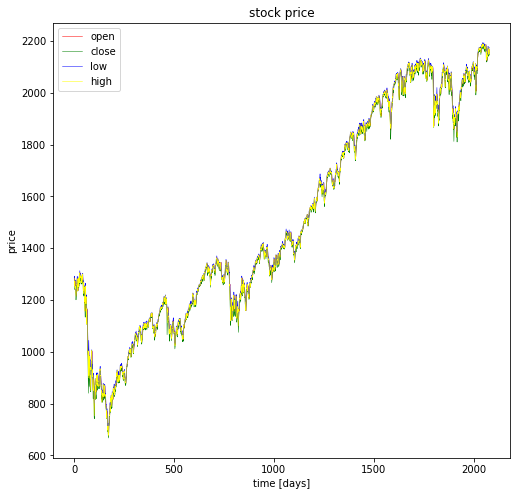

In [76]:
## This observation is only for raw_dataset, not from autoencoder result
## 'Close Price', 'Open Price','High Price','Low Price',
plt.figure(figsize=(18, 8));
plt.subplot(1,2,1);
plt.plot(dfmain['Open Price'], color='red', label='open',linewidth=0.5)
plt.plot(dfmain['Low Price'], color='green', label='close',linewidth=0.5)
plt.plot(dfmain['High Price'], color='blue', label='low',linewidth=0.5)
plt.plot(dfmain['Close Price'], color='yellow', label='high',linewidth=0.5)
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()


## 3. Manipulate data

In [77]:
## Spring 2019
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    scaler = [None] * df.shape[1]
    for i in range(df.shape[1]):
        scaler[i] = min_max_scaler.fit(df.iloc[:,i].values.reshape(-1,1))
        df.iloc[:,i] = scaler[i].transform(df.iloc[:,i].values.reshape(-1,1))          
    return scaler, df

In [78]:
# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    print(len(data[0][0])) ## (len-20)*seq_len* features(include close)
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [79]:
## Data without normalization
[x_train_ori, y_train_ori, x_valid_ori, y_valid_ori, x_test_ori, y_test_ori] = load_data(df, 20)

19


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Data With Normalization, Choose sequence length

In [80]:
# choose one stock
df_stock = df.copy()

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
min_max_scaler, df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
# x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
19
x_train.shape =  (1647, 19, 19)
y_train.shape =  (1647, 19)
x_valid.shape =  (206, 19, 19)
y_valid.shape =  (206, 19)
x_test.shape =  (206, 19, 19)
y_test.shape =  (206, 19)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##  Model and validate data

In [81]:
# - RNNs with basic, LSTM, GRU cells
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
print(perm_array)
np.random.shuffle(perm_array)

[   0    1    2 ... 1644 1645 1646]


In [82]:
# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size       
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [ ]:
# parameters

# Remember to adjust this!!
index_to_begin = 15
index_to_stop = 18

n_steps = seq_len-1 
# Remember to adjust this!!
n_inputs = 19
n_neurons = 512 # try 256 later

# Remember to adjust this!!
n_outputs = 19 

n_layers = 5  # try 3 and 7 later
learning_rate = 0.0005
batch_size = 50 # batch size should be 60
n_epochs = 200  # should be 200
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell with leaky_relu
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.leaky_relu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)[index_to_begin:index_to_stop]) 
# loss function = mean squared error 
#I made loss function only dependend on the indexes that we are interested in, instead of all variables

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

                                              # run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%d epochs: MSE train/valid = %.6f/%.6f'%(
                int(iteration*batch_size/train_set_size), mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0 epochs: MSE train/valid = 0.363587/0.530783
4 epochs: MSE train/valid = 0.147162/0.206226
9 epochs: MSE train/valid = 0.130735/0.157873
14 epochs: MSE train/valid = 0.144325/0.185691
19 epochs: MSE train/valid = 0.116125/0.147991
24 epochs: MSE train/valid = 0.127619/0.145051
29 epochs: MSE train/valid = 0.124843/0.114462
34 epochs: MSE train/valid = 0.127800/0.140210
39 epochs: MSE train/valid = 0.149389/0.143789
44 epochs: MSE train/valid = 0.149926/0.142685
49 epochs: MSE train/valid = 0.160399/0.118726
54 epochs: MSE train/valid = 0.137938/0.124349
59 epochs: MSE train/valid = 0.127280/0.100977
64 epochs: MSE train/valid = 0.149849/0.141219
69 epochs: MSE train/valid = 0.127322/0.108383
74 epochs: MSE train/valid = 0.123606/0.120713
79 epochs: MSE train/valid = 0.139866/0.115288
84 epochs: MSE train/valid = 0.069310/0.082174
89 epochs: MSE train/valid = 0.067482/0.077604
94 epochs: MSE train/valid = 0.071123/0.099396
99 epochs: MSE train/valid = 0.068046/0.098883
104 epochs: MSE 

### De-normalize

In [ ]:
# # 5. Predictions <a class="anchor" id="5-bullet"></a> 

#De-normalize the values
for i in range(y_train.shape[1]):
    y_train[:,i] = min_max_scaler[i].inverse_transform(y_train[:,i].reshape(1,-1))
    y_train_pred[:,i] = min_max_scaler[i].inverse_transform(y_train_pred[:,i].reshape(1,-1))
    y_valid[:,i] = min_max_scaler[i].inverse_transform(y_valid[:,i].reshape(1,-1))
    y_valid_pred[:,i] = min_max_scaler[i].inverse_transform(y_valid_pred[:,i].reshape(1,-1))
    y_test[:,i] = min_max_scaler[i].inverse_transform(y_test[:,i].reshape(1,-1))
    y_test_pred[:,i] = min_max_scaler[i].inverse_transform(y_test_pred[:,i].reshape(1,-1))


In [ ]:

# Remember to change this!!!
ft = 18  # 24=open, 25=high, 26=low, close=27


## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Past and Future stock prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
                  y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Future Stock Prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');


#adjust the columns of the variables in order to get the right accuracy prediction. 
sign_correct_train = np.sum(np.equal(np.sign(y_train[1:,ft]-y_train[:len(y_train)-1,ft]),
            np.sign(y_train_pred[1:,ft]-y_train_pred[:len(y_train_pred)-1,ft])).astype(int))
corr_price_development_train = sign_correct_train / y_train.shape[0]

sign_correct_valid = np.sum(np.equal(np.sign(y_valid[1:,ft]-y_valid[:len(y_valid)-1,ft]),
            np.sign(y_valid_pred[1:,ft]-y_valid_pred[:len(y_valid_pred)-1,ft])).astype(int))
corr_price_development_valid = sign_correct_valid / y_valid.shape[0]

sign_correct_test = np.sum(np.equal(np.sign(y_test[1:,ft]-y_test[:len(y_test)-1,ft]),
            np.sign(y_test_pred[1:,ft]-y_test_pred[:len(y_test_pred)-1,ft])).astype(int))
corr_price_development_test = sign_correct_test / y_test.shape[0]

print('correct sign prediction for close - (close-1) price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()

In [ ]:
#Test the significance level of our correct sign prediction
significance_train = scipy.stats.binom_test(sign_correct_train, n=y_train.shape[0], p=0.50)
significance_valid = scipy.stats.binom_test(sign_correct_valid, n=y_valid.shape[0], p=0.50)
significance_test = scipy.stats.binom_test(sign_correct_test, n=y_test.shape[0], p=0.50)
print(significance_train)
print(significance_valid)
print(significance_test)

In [ ]:
#Calculate MAPE
mape_train = np.mean(abs(np.divide(y_train_pred,y_train)))
mape_valid = np.mean(abs(np.divide(y_valid_pred, y_valid)))
mape_test = np.mean(abs(np.divide(y_test_pred, y_test)))
print('MAPE for train/validation/test set : %.2f/%.2f/%.2f'%(mape_train, mape_valid, mape_test))

In [ ]:
#Store the actual values and predictions in a dataframe and export

log_files_path_export = 'Data/Output/'
export_pred = np.concatenate([y_train_pred, y_valid_pred, y_test_pred])
export_pred_df = pd.DataFrame(export_pred)
export_pred_df.to_csv(log_files_path_export + 'LSTM_AE17-13-9_60-40-25-15-6_Raw_NLP.csv')


export_actual =  np.concatenate([y_train, y_valid, y_test])
export_actual_df = pd.DataFrame(export_actual)
export_actual_df.to_csv(log_files_path_export + 'actual_LSTM_AE17-13-9_60-40-25-15-6_Raw_NLP.csv')